In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import statsmodels.api as sm
%matplotlib inline
import scipy.stats


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)
df=df.drop("Unnamed: 0",axis=1)

In [3]:
df['CHAS'].replace(1,"yes", inplace=True)
df['CHAS'].replace(0,"No", inplace=True)

In [4]:
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,No,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,No,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,No,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,No,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,No,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,No,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,No,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,No,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,No,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,No,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


D:\py data\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

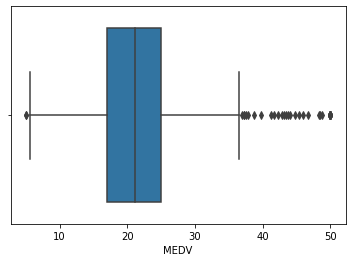

In [5]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(df["MEDV"])

Text(0.5, 1.0, 'Charles river variable')

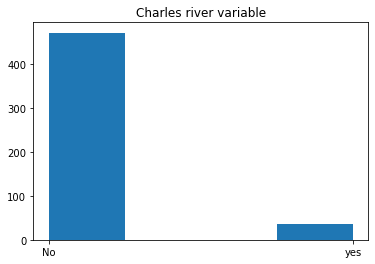

In [6]:
# Provide a  histogram for the Charles river variable
plt.hist(df["CHAS"],bins=4)
plt.title("Charles river variable")


In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and 
#younger, between 35 and 70 years and 70 years and older)
df.loc[(df["AGE"] <= 35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"] >= 70),'age_group'] = '70 years and older'


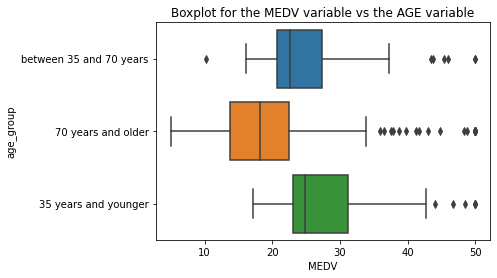

In [8]:
sns.boxplot(x=df.MEDV, y=df.age_group, data=df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

In [9]:
df[["INDUS","NOX"]].corr()

,INDUS,NOX
INDUS,1.000000,0.763651
NOX,0.763651,1.000000


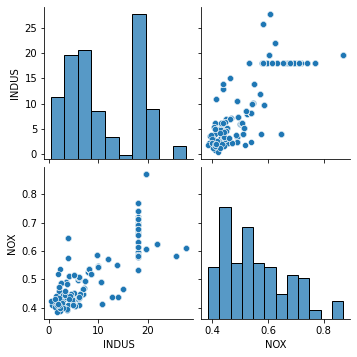

In [10]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?
sns.pairplot(df[["INDUS","NOX"]])

We can say that the relation between Nitric oxide concentrations and the proportion of non-retail business  acres per town are approximately positively  correlated with them.


Text(0.5, 0, 'pupil-teacher ratio')

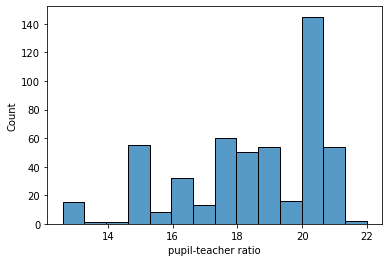

In [11]:
# Create a histogram for the pupil to teacher ratio variable
t=sns.histplot(df["PTRATIO"])
t.set_xlabel("pupil-teacher ratio")


 # Task 5: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis(H0): Both average MEDV are the same

Alternative Hypothesis(H1): Both average MEDV are NOT the same

In [12]:
df['CHAS'].replace('yes',1, inplace=True)
df['CHAS'].replace('No',0, inplace=True)
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [13]:
a = df[df["CHAS"] == 0]["MEDV"]
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [14]:
b = df[df["CHAS"] == 1]["MEDV"]
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [15]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

 # Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



In [16]:
df["AGE"].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

### State the hypothesis

H0:  µ1=µ2=µ3 (the three population means are equal)

H1:  At least one of the means differ

In [17]:
low = df[df["age_group"] == '35 years and younger']["MEDV"]
mid = df[df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = df[df["age_group"] == '70 years and older']["MEDV"]

In [18]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)

In [19]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#### State the hypothesis

H0: NOX is not correlated with INDUS

H1:  NOX is correlated with INDUS

In [20]:
pearson,p_value = scipy.stats.pearsonr(df["NOX"],df["INDUS"])

In [21]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.763651446920915, P-value=7.913361061239593e-98


Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#### State Hypothesis

H0: weighted distances to five Boston employment centres are not related to median value

H1: weighted distances to five Boston employment centres are related to median value

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'age_group'],
      dtype='object')

In [23]:
y = df['MEDV']
x = df['DIS']

In [24]:
x = sm.add_constant(x)

D:\py data\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
results = sm.OLS(y,x).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.21e-08
Time:                        21:17:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
np.sqrt(0.062) 

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation between both features



In [28]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


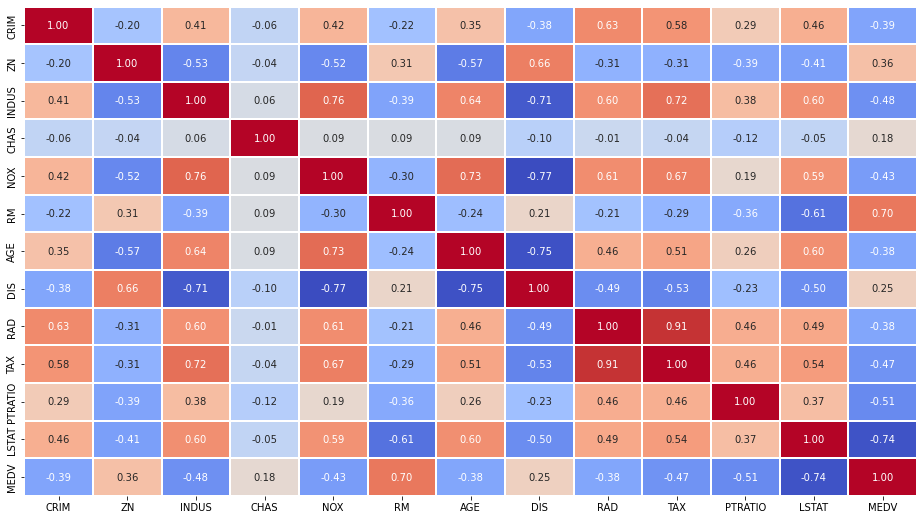

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()
